# Image Classification using VGG16

## Based on VGG16 and VGG19 calssification

In [3]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16


from keras.applications.vgg19 import preprocess_input
from keras.applications.vgg19 import decode_predictions
from keras.applications.vgg19 import VGG19

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [4]:
def show_img(img_path):
    img=mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.show()

In [5]:
def vgg16_pred(image_path):
    # load the model
    model = VGG16()
    # load an image from file
    image = load_img(image_path, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)

    # predict the probability across all output classes
    yhat = model.predict(image)
    # convert the probabilities to class labels
    label = decode_predictions(yhat)
    # retrieve the most likely result, e.g. highest probability
    label = label[0][0]
    # print the classification
    print('vgg16 prediction: %s (%.2f%%)' % (label[1], label[2]*100))


In [6]:
def vgg19_pred(image_path):
    # load the model
    model = VGG19()
    # load an image from file
    image = load_img(image_path, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)

    # predict the probability across all output classes
    yhat = model.predict(image)
    # convert the probabilities to class labels
    label = decode_predictions(yhat)
    # retrieve the most likely result, e.g. highest probability
    label = label[0][0]
    # print the classification
    
    print('vgg19 prediction: %s (%.2f%%)' % (label[1], label[2]*100))


## Testing the models

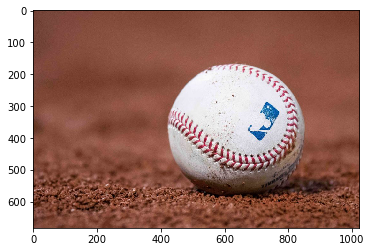

vgg16 prediction: baseball (99.98%)
vgg19 prediction: baseball (99.99%)


In [39]:
show_img('images/balls/b3.jpg')
vgg16_pred('images/balls/b3.jpg')
vgg19_pred('images/balls/b3.jpg')

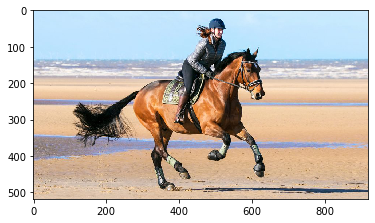

vgg16 prediction: Arabian_camel (88.28%)
vgg19 prediction: Arabian_camel (69.88%)


In [40]:
show_img('images/horses/h4.jpg')
vgg16_pred('images/horses/h4.jpg')
vgg19_pred('images/horses/h4.jpg')

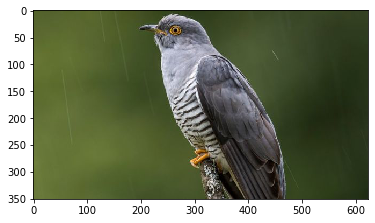

vgg16 prediction: kite (80.59%)
vgg19 prediction: kite (29.71%)


In [41]:
show_img('images/birds/bird1.jpg')
vgg16_pred('images/birds/bird1.jpg')
vgg19_pred('images/birds/bird1.jpg')

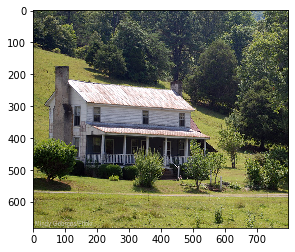

vgg16 prediction: barn (61.99%)
vgg19 prediction: barn (69.14%)


In [42]:
show_img('images/houses/ho17.jpg')
vgg16_pred('images/houses/ho17.jpg')
vgg19_pred('images/houses/ho17.jpg')

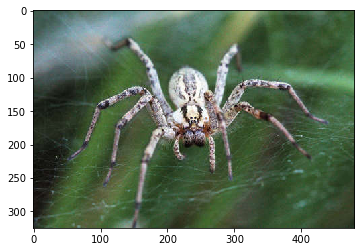

vgg16 prediction: garden_spider (39.49%)
vgg19 prediction: wolf_spider (40.85%)


In [43]:
show_img('images/spiders/spider8.jpg')
vgg16_pred('images/spiders/spider8.jpg')
vgg19_pred('images/spiders/spider8.jpg')

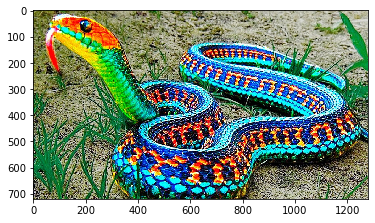

vgg16 prediction: garter_snake (35.47%)
vgg19 prediction: starfish (27.11%)


In [45]:
show_img('images/snakes/snake23.jpg')
vgg16_pred('images/snakes/snake23.jpg')
vgg19_pred('images/snakes/snake23.jpg')

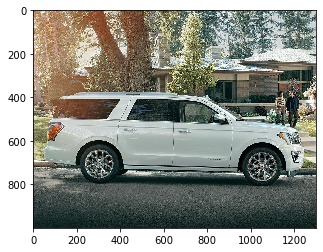

vgg16 prediction: minivan (24.47%)
vgg19 prediction: minivan (24.61%)


In [46]:
show_img('images/cars/c1.jpg')
vgg16_pred('images/cars/c1.jpg')
vgg19_pred('images/cars/c1.jpg')

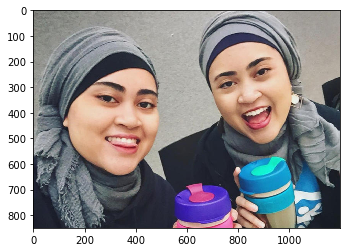

vgg16 prediction: hair_spray (23.62%)
vgg19 prediction: bathing_cap (29.39%)


In [47]:
show_img('images/women/women4.jpg')
vgg16_pred('images/women/women4.jpg')
vgg19_pred('images/women/women4.jpg')

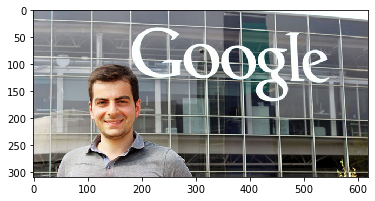

vgg16 prediction: planetarium (14.39%)
vgg19 prediction: planetarium (56.84%)


In [48]:
show_img('images/men/men15.jpg')
vgg16_pred('images/men/men15.jpg')
vgg19_pred('images/men/men15.jpg')

In [49]:
from os import listdir
from os.path import isfile, join
files = [f for f in listdir('images/test-images') if isfile(join('images/test-images', f))]

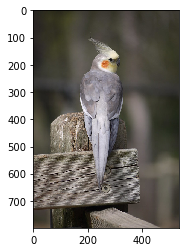

vgg16 prediction: kite (42.99%)
vgg19 prediction: kite (95.39%)


In [50]:
#pick a random image from the test images
filepath = 'images/test-images/'+files[random.randint(0, len(files))]
show_img(filepath)
vgg16_pred(filepath)
vgg19_pred(filepath)

## Based on the Edited model

Below codes are Vgg16 and VGG19 after editing the last four layers to make it predict the images based on the nine provided classification.

In [9]:
# Importing all necessary libraries 
from keras.preprocessing.image import ImageDataGenerator 
from keras.applications import VGG16
from keras.applications import VGG19
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers


In [10]:
#Load the VGG models
vgg16_conv = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg19_conv = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [11]:
# Freeze the layers except the last 4 layers
for layer in vgg16_conv.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg16_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x13c69f278> False
<keras.layers.convolutional.Conv2D object at 0x13c69f208> False
<keras.layers.convolutional.Conv2D object at 0x13c69f5c0> False
<keras.layers.pooling.MaxPooling2D object at 0x13c69f908> False
<keras.layers.convolutional.Conv2D object at 0x13c69fcc0> False
<keras.layers.convolutional.Conv2D object at 0x13c5f0748> False
<keras.layers.pooling.MaxPooling2D object at 0x139bf2f60> False
<keras.layers.convolutional.Conv2D object at 0x139bf2c88> False
<keras.layers.convolutional.Conv2D object at 0x139c237f0> False
<keras.layers.convolutional.Conv2D object at 0x139c11b70> False
<keras.layers.pooling.MaxPooling2D object at 0x139bf9ef0> False
<keras.layers.convolutional.Conv2D object at 0x139bf9a90> False
<keras.layers.convolutional.Conv2D object at 0x13c57a780> False
<keras.layers.convolutional.Conv2D object at 0x13c5a2f98> False
<keras.layers.pooling.MaxPooling2D object at 0x13c580e80> False
<keras.layers.convolutional.Conv2D obj

In [12]:
# Create the model
model16 = models.Sequential()
 
# Add the vgg convolutional base model
model16.add(vgg16_conv)
 
# Add new layers
model16.add(layers.Flatten())
model16.add(layers.Dense(1024, activation='relu'))
model16.add(layers.Dropout(0.5))
model16.add(layers.Dense(9, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model16.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 9225      
Total params: 40,415,049
Trainable params: 32,779,785
Non-trainable params: 7,635,264
_________________________________________________________________


In [13]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        'images/train',
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        'images/valid',
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 173 images belonging to 9 classes.
Found 55 images belonging to 9 classes.


In [14]:
# Compile the model
model16.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history16 = model16.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model16.save('small_last4.h5')

Epoch 1/10
2/1 [==================================] - 43s 22s/step - loss: 2.5767 - acc: 0.1850 - val_loss: 3.8331 - val_acc: 0.4000
Epoch 2/10
2/1 [==================================] - 38s 19s/step - loss: 2.0792 - acc: 0.3699 - val_loss: 1.7713 - val_acc: 0.4909
Epoch 3/10
2/1 [==================================] - 40s 20s/step - loss: 1.3491 - acc: 0.5434 - val_loss: 1.1604 - val_acc: 0.7273
Epoch 4/10
2/1 [==================================] - 38s 19s/step - loss: 0.7764 - acc: 0.7457 - val_loss: 0.6990 - val_acc: 0.8364
Epoch 5/10
2/1 [==================================] - 36s 18s/step - loss: 0.3161 - acc: 0.9075 - val_loss: 1.0576 - val_acc: 0.8182
Epoch 6/10
2/1 [==================================] - 37s 19s/step - loss: 0.8355 - acc: 0.7514 - val_loss: 0.1855 - val_acc: 0.5273
Epoch 7/10
2/1 [==================================] - 37s 18s/step - loss: 1.5380 - acc: 0.6069 - val_loss: 1.2589 - val_acc: 0.8545
Epoch 8/10
2/1 [==================================] - 37s 19s/step - 

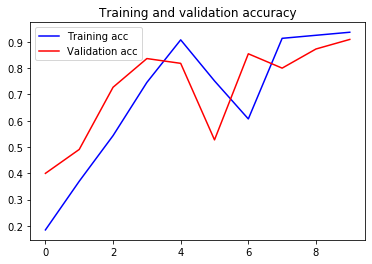

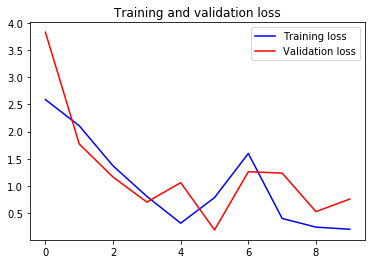

In [15]:
acc = history16.history['acc']
val_acc = history16.history['val_acc']
loss = history16.history['loss']
val_loss = history16.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [25]:
def vgg16_edited_pred(model, image_path):
    # load an image from file
    image = load_img(image_path, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)

    # predict the probability across all output classes
    yhat = model.predict(image)
    # convert the probabilities to class labels
    predicted_class = np.argmax(yhat,axis=1)
    
    pred_label = idx2label[pred_class]
    # retrieve the most likely result, e.g. highest probability
    
    # print the classification
    print('vgg16 edited prediction: {}'.format(pred_label))


# Based on VGG19 calssification

In [17]:
# Freeze the layers except the last 4 layers
for layer in vgg19_conv.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg19_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x1127994a8> False
<keras.layers.convolutional.Conv2D object at 0x13ca87cc0> False
<keras.layers.convolutional.Conv2D object at 0x13ca897f0> False
<keras.layers.pooling.MaxPooling2D object at 0x13ca76390> False
<keras.layers.convolutional.Conv2D object at 0x13ca764a8> False
<keras.layers.convolutional.Conv2D object at 0x13ca63b70> False
<keras.layers.pooling.MaxPooling2D object at 0x13caae400> False
<keras.layers.convolutional.Conv2D object at 0x13caae048> False
<keras.layers.convolutional.Conv2D object at 0x13cabdba8> False
<keras.layers.convolutional.Conv2D object at 0x13cad3320> False
<keras.layers.convolutional.Conv2D object at 0x13d064400> False
<keras.layers.pooling.MaxPooling2D object at 0x13d064eb8> False
<keras.layers.convolutional.Conv2D object at 0x13d0792e8> False
<keras.layers.convolutional.Conv2D object at 0x13d08aa90> False
<keras.layers.convolutional.Conv2D object at 0x13d09c390> False
<keras.layers.convolutional.Conv2D obj

In [18]:
# Create the model
model19 = models.Sequential()
 
# Add the vgg convolutional base model
model19.add(vgg19_conv)
 
# Add new layers
model19.add(layers.Flatten())
model19.add(layers.Dense(1024, activation='relu'))
model19.add(layers.Dropout(0.5))
model19.add(layers.Dense(9, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model19.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 9225      
Total params: 45,724,745
Trainable params: 32,779,785
Non-trainable params: 12,944,960
_________________________________________________________________


In [19]:
# Compile the model
model19.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history19 = model19.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model19.save('small_last4.h5')

Epoch 1/10
2/1 [==================================] - 51s 25s/step - loss: 3.8208 - acc: 0.1040 - val_loss: 2.2974 - val_acc: 0.1455
Epoch 2/10
2/1 [==================================] - 48s 24s/step - loss: 2.3554 - acc: 0.2023 - val_loss: 2.0528 - val_acc: 0.4727
Epoch 3/10
2/1 [==================================] - 48s 24s/step - loss: 1.6593 - acc: 0.4740 - val_loss: 1.8120 - val_acc: 0.5818
Epoch 4/10
2/1 [==================================] - 50s 25s/step - loss: 1.2525 - acc: 0.5838 - val_loss: 0.5936 - val_acc: 0.7636
Epoch 5/10
2/1 [==================================] - 47s 24s/step - loss: 0.6866 - acc: 0.7919 - val_loss: 2.2997 - val_acc: 0.6182
Epoch 6/10
2/1 [==================================] - 45s 22s/step - loss: 0.8883 - acc: 0.7225 - val_loss: 0.1968 - val_acc: 0.7818
Epoch 7/10
2/1 [==================================] - 45s 22s/step - loss: 0.4088 - acc: 0.9191 - val_loss: 0.7826 - val_acc: 0.8545
Epoch 8/10
2/1 [==================================] - 47s 24s/step - 

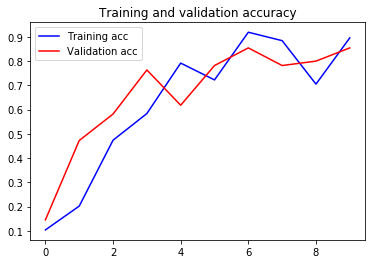

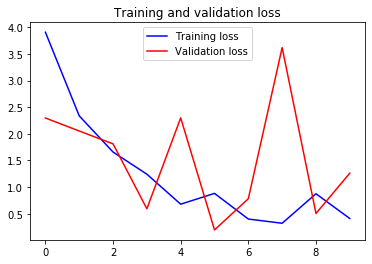

In [20]:
acc = history19.history['acc']
val_acc = history19.history['val_acc']
loss = history19.history['loss']
val_loss = history19.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

# Testing the models

Found 55 images belonging to 9 classes.
6/5 [================================] - 7s 1s/step
No of errors = 9/55


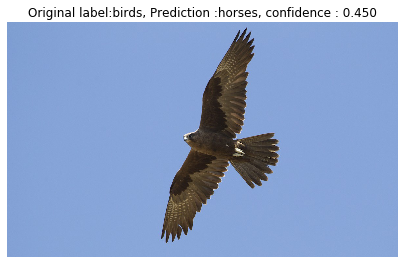

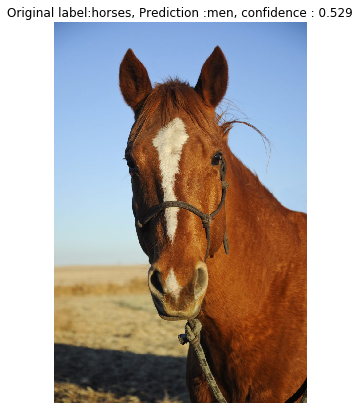

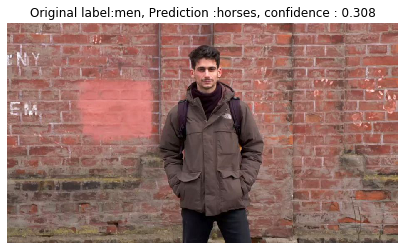

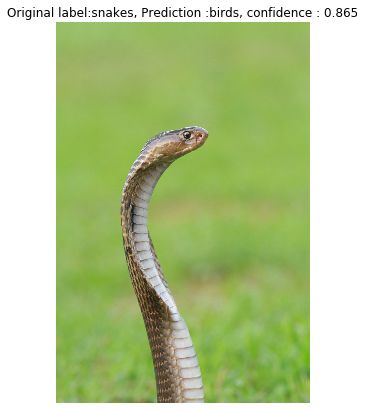

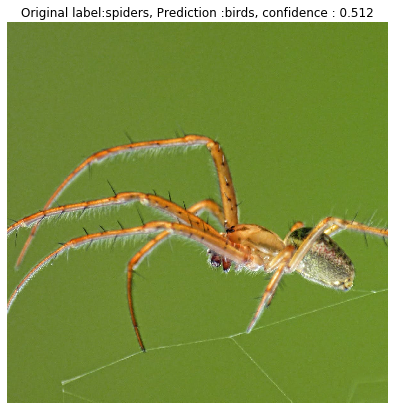

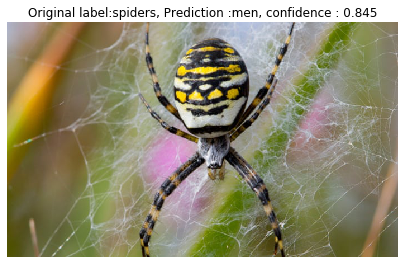

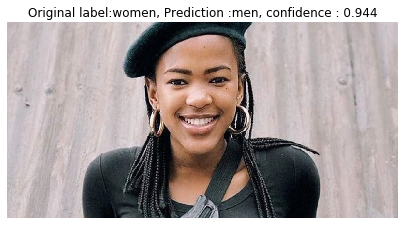

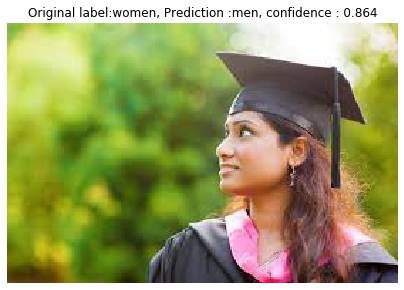

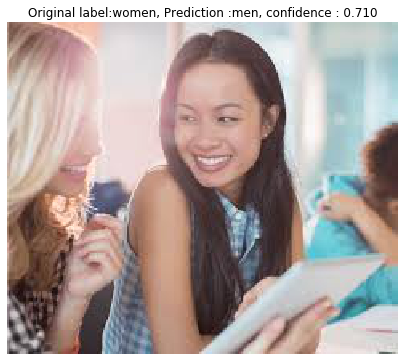

In [173]:
print('VGG16 edited model')
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        'images/valid',
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)
 
# Get the filenames from the generator
fnames = validation_generator.filenames
 
# Get the ground truth from generator
ground_truth = validation_generator.classes
 
# Get the label to class mapping from the generator
label2index = validation_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model16.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))
 
# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
     
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
     
    original = load_img('{}/{}'.format('images/valid',fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()

Found 55 images belonging to 9 classes.
6/5 [================================] - 9s 2s/step
No of errors = 13/55


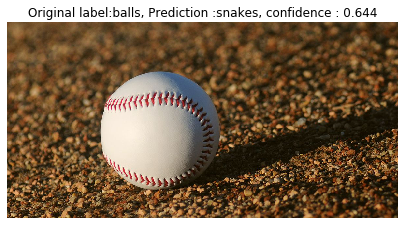

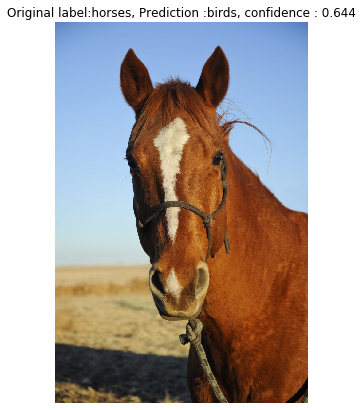

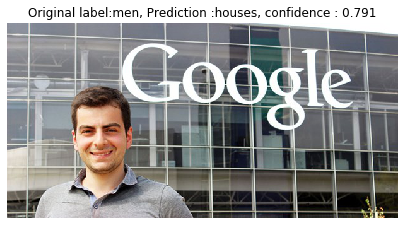

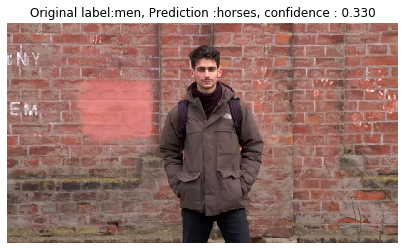

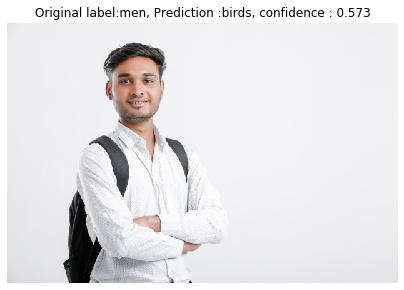

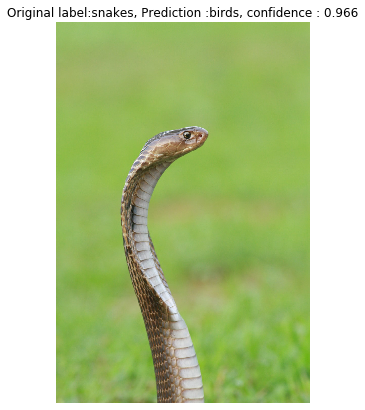

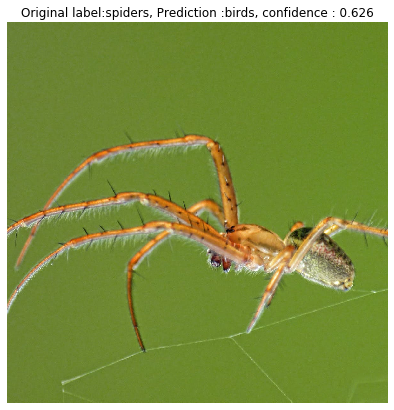

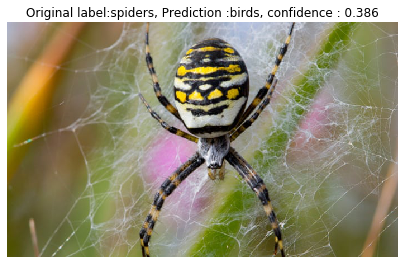

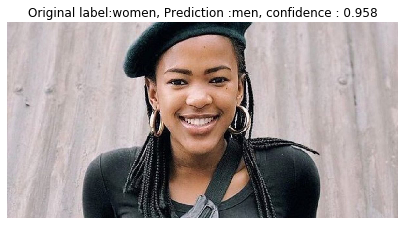

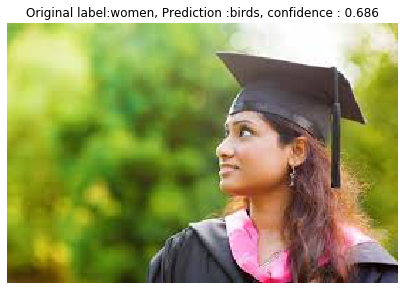

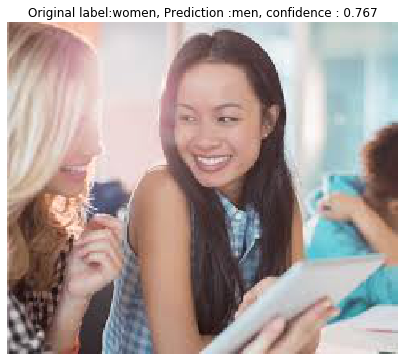

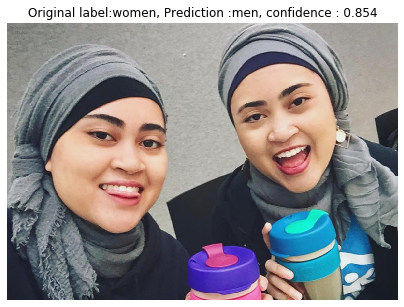

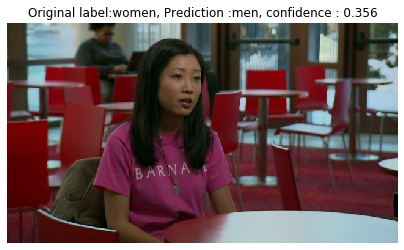

In [120]:
print('VGG16 edited model')
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        'images/valid',
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)
 
# Get the filenames from the generator
fnames = validation_generator.filenames
 
# Get the ground truth from generator
ground_truth = validation_generator.classes
 
# Get the label to class mapping from the generator
label2index = validation_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model19.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))
 
# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
     
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
     
    original = load_img('{}/{}'.format('images/valid',fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()